In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_datareader import data as pdr 
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Make the dataset 
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

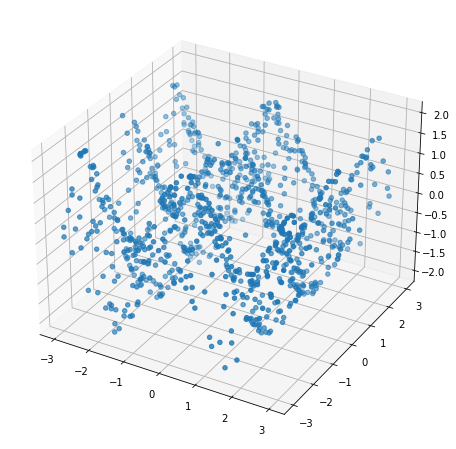

In [3]:
#Plot it 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y);

In [4]:
#SVR 
model = SVR(C=100.)
model.fit(X, Y);

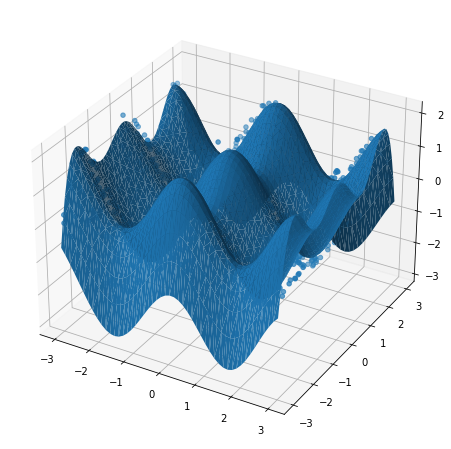

In [5]:
#Plot the prediction surface
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);


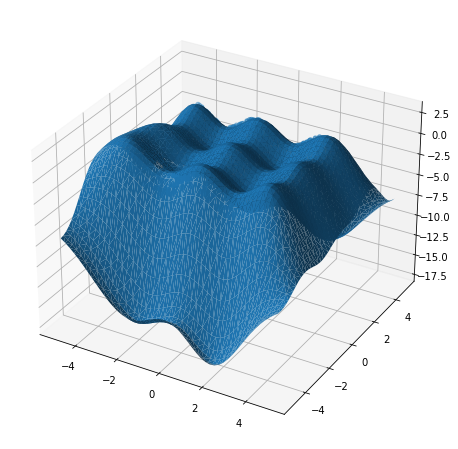

In [6]:
# Can it Extrapolate?
#Plot the prediction surface
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

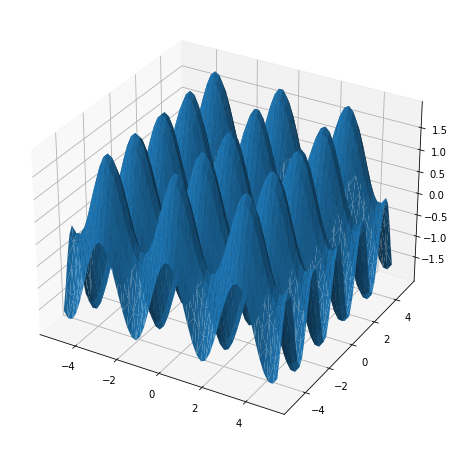

In [7]:
# What the true function looks like
# Can it Extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,projection = '3d')
#ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])# the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True)
plt.show()

In [8]:
model = RandomForestRegressor()
model.fit(X,Y)

RandomForestRegressor()

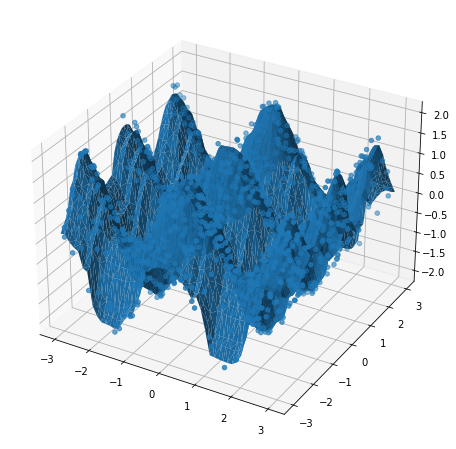

In [9]:
# Plot the prediction surface
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

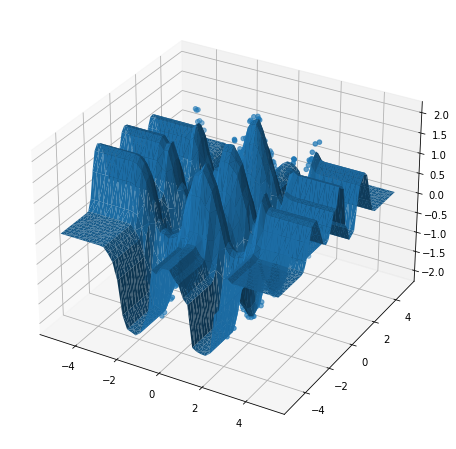

In [10]:
# Can it extraploate?
# Plot the prediction surface
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

In [11]:
#model = MLPRegressor(hidden_layer_size=128,alpha=0 , learning_rate_init=0.01)
#model.fit(X,Y)

## Stock Prices

In [16]:
df = pdr.get_data_yahoo('SPY',start = '2010-01-01' ,end = '2019-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,88.860359
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,89.095604
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,89.158333
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,89.534691
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,89.832619
...,...,...,...,...,...,...
2018-12-24,240.839996,234.270004,239.039993,234.339996,147311600.0,220.248917
2018-12-26,246.179993,233.759995,235.970001,246.179993,218485400.0,231.376953
2018-12-27,248.289993,238.960007,242.570007,248.070007,186267300.0,233.153305


In [17]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [19]:
Xtrain = []
for t in range(len(train) - 1):
    x0 = train[t]
    x1 = train[t + 1]
    Xtrain.append((x0,x1))
    
Xtest = []
for t in range(len(test) - 1):
    x0 = test[t]
    x1 = test[t + 1]
    Xtest.append((x0,x1))

In [24]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

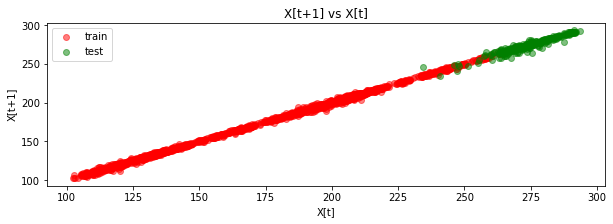

In [28]:
plt.figure(figsize=(10,3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test')
plt.legend();